In [1]:
#imports
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
#combine all tmbd by year files into a single dataframe
#define file path and grabbing all csv.gz files that start with final
files = os.path.join("Data", "final*.csv.gz")
#glob files together
files = glob.glob(files)
print("CSV of all years of tmdb api data");
#concat files into one dataframe
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df.shape)
df.shape
df.head()

CSV of all years of tmdb api data
(60625, 26)


,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.000,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,1925.0,PG


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60625 entries, 0 to 60624
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60625 non-null  object 
 1   adult                  60603 non-null  float64
 2   backdrop_path          37718 non-null  object 
 3   belongs_to_collection  3881 non-null   object 
 4   budget                 60603 non-null  float64
 5   genres                 60603 non-null  object 
 6   homepage               14780 non-null  object 
 7   id                     60603 non-null  float64
 8   original_language      60603 non-null  object 
 9   original_title         60603 non-null  object 
 10  overview               59265 non-null  object 
 11  popularity             60603 non-null  float64
 12  poster_path            55088 non-null  object 
 13  production_companies   60603 non-null  object 
 14  production_countries   60603 non-null  object 
 15  re

# Data Preprocessing

In [4]:
#remove the first line of imbd id 0 and reset index
df = df.loc[ df['imdb_id']!='0']
df = df.reset_index(drop=True)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
1,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
2,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.000,0.0,NaN
3,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.106,1925.0,PG
4,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.900,46.0,R


In [5]:
#drop columns that are not candidate features in our testing
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
             'poster_path','status','tagline','id','homepage',
             'production_countries','video','production_companies',
             'spoken_languages',
             'original_language']
df = df.drop(columns=drop_cols)
df

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0113026,0.0,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",3.133,2000-09-22,0.0,86.0,The Fantasticks,5.500,22.0,NaN
1,tt0113092,0.0,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",2.253,2000-11-15,0.0,100.0,For the Cause,5.100,8.0,NaN
2,tt0116391,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",1.383,2000-04-14,0.0,152.0,Gang,0.000,0.0,NaN
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.407,2000-09-29,12854953.0,99.0,In the Mood for Love,8.106,1925.0,PG
4,tt0118852,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",3.515,2000-09-02,0.0,99.0,Chinese Coffee,6.900,46.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60598,tt9896876,0.0,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",4.468,2021-11-19,0.0,101.0,India Sweets and Spices,6.000,2.0,PG-13
60599,tt9898844,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",234.278,2022-01-21,0.0,91.0,The Hunting,4.800,27.0,NaN
60600,tt9900940,0.0,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",3.462,2021-12-07,0.0,87.0,The Scrapper,6.000,2.0,NaN
60601,tt9907782,0.0,NaN,0.0,"[{'id': 27, 'name': 'Horror'}, {'id': 14, 'nam...",17.439,2021-07-28,4588389.0,111.0,The Cursed,6.700,88.0,R


In [6]:
#next, remove all movies with zero revenue
df.drop(df[df['revenue']==0].index, inplace = True)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.407,2000-09-29,12854953.0,99.0,In the Mood for Love,8.106,1925.0,PG
9,tt0120263,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",6.043,2000-10-06,80334.0,98.0,Songs from the Second Floor,7.234,214.0,NaN
10,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.832,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R
12,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",45.751,2000-06-21,224834564.0,84.0,Chicken Run,6.723,4086.0,G
15,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",9.333,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.942,252.0,R


- Cleaning up Certification column

In [7]:
df['certification'].value_counts(dropna=False)

NaN       2449
R         2340
PG-13     1727
PG         637
NR         281
G          127
NC-17       21
R            1
PG-13        1
Name: certification, dtype: int64

In [8]:
#First, we will remove any extra spaces in the values
df['certification'] = df['certification'].str.strip()

In [9]:
#standardize uncommon certification ratings as Not Rate, NR
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
#setting 10 as NaN due to difficulty in interpreting the intended value
             '10':np.nan, 
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      2449
R        2341
PG-13    1728
PG        637
NR        281
G         127
NC-17      21
Name: certification, dtype: int64

# Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- $H_0$ (Null Hypothesis): There is no difference in the revenue of movies across all rating certifications.

- $H_A$ (Alternative Hypothesis): The rating certification has a significant affect on a movies revenue.

- Test selection

>Our target of investigation, the ratings, is categorical and our metric, revenue, is numeric. As such, we will be using the ANOVA and/or Tukey test.

>The following assumptions will be tested:
    No significant outliers,
    Equal variance,
    Normality.


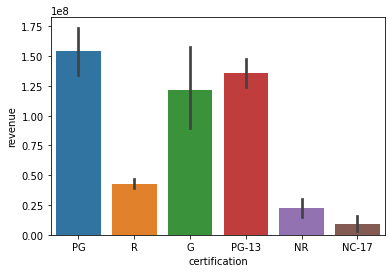

In [10]:
#initial visualization for comparison with the post test data
sns.barplot(data=df, x='certification',y='revenue');

## Testing assumptions

- Removal of outliers

In [11]:
#create a dataframe for each rating certification
G = df.loc[df['certification']=='G']
PG = df.loc[df['certification']=='PG']
PG_13 = df.loc[df['certification']=='PG-13']
R = df.loc[df['certification']=='R']
NC_17 = df.loc[df['certification']=='NC-17']
NR = df.loc[df['certification']=='NR']

In [12]:
#use the zscore metric to detect...
outlier_G = np.abs(stats.zscore(G['revenue'])) > 3
print(f"There are {outlier_G.sum()} outliers out of {len(G)} entries")

There are 4 outliers out of 127 entries


In [13]:
#...and remove outliers as needed
G = G.loc[~outlier_G]
print(G.shape)
G.head()

(123, 13)


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
12,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",45.751,2000-06-21,224834564.0,84.0,Chicken Run,6.723,4086.0,G
19,tt0120917,0.0,"{'id': 178117, 'name': ""The Emperor's New Groo...",100000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",92.132,2000-12-15,169327687.0,78.0,The Emperor's New Groove,7.547,5558.0,G
274,tt0192255,0.0,NaN,35000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",25.162,2000-10-27,27965865.0,95.0,The Little Vampire,6.795,336.0,G
382,tt0205461,0.0,NaN,19000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",8.422,2000-07-14,19748009.0,84.0,Thomas and the Magic Railroad,5.500,54.0,G
445,tt0211181,0.0,"{'id': 124916, 'name': '101 Dalmatians (Live-A...",85000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",13.908,2000-10-07,183611771.0,100.0,102 Dalmatians,5.500,1140.0,G


In [14]:
outlier_PG = np.abs(stats.zscore(PG['revenue'])) > 3
print(f"There are {outlier_PG.sum()} outliers out of {len(PG)} entries")

There are 20 outliers out of 637 entries


In [15]:
PG = PG.loc[~outlier_PG]
print(PG.shape)
PG.head()

(617, 13)


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.407,2000-09-29,12854953.0,99.0,In the Mood for Love,8.106,1925.0,PG
18,tt0120913,0.0,NaN,75000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 28, '...",15.180,2000-06-16,36754634.0,94.0,Titan A.E.,6.591,870.0,PG
21,tt0122459,0.0,NaN,24000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",11.213,2000-04-07,36609995.0,115.0,Return to Me,6.712,321.0,PG
26,tt0130623,0.0,NaN,127500000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",104.000,2000-05-19,354248063.0,82.0,Dinosaur,6.485,2062.0,PG
27,tt0131704,0.0,NaN,76000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",9.203,2000-06-30,35134820.0,88.0,The Adventures of Rocky & Bullwinkle,4.072,305.0,PG


In [16]:
outlier_PG_13 = np.abs(stats.zscore(PG_13['revenue'])) > 3
print(f"There are {outlier_PG_13.sum()} outliers out of {len(PG_13)} entries")

There are 41 outliers out of 1728 entries


In [17]:
PG_13 = PG_13.loc[~outlier_PG_13]
print(PG_13.shape)
PG_13.head()

(1687, 13)


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
16,tt0120755,0.0,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",34.178,2000-05-24,546388105.0,123.0,Mission: Impossible II,6.107,5395.0,PG-13
17,tt0120903,0.0,"{'id': 748, 'name': 'X-Men Collection', 'poste...",75000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",2.024,2000-07-13,296339527.0,104.0,X-Men,6.987,9734.0,PG-13
44,tt0141926,0.0,NaN,62000000.0,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",16.591,2000-04-20,127666415.0,116.0,U-571,6.437,957.0,PG-13
49,tt0144528,0.0,"{'id': 86028, 'name': 'The Nutty Professor Col...",84000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 35, 'na...",18.210,2000-07-27,123307945.0,106.0,Nutty Professor II: The Klumps,5.014,1076.0,PG-13
53,tt0146309,0.0,NaN,80000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",12.539,2000-12-24,34566746.0,145.0,Thirteen Days,7.017,573.0,PG-13


In [18]:
outlier_R = np.abs(stats.zscore(R['revenue'])) > 3
print(f"There are {outlier_R.sum()} outliers out of {len(R)} entries")

There are 53 outliers out of 2341 entries


In [19]:
R = R.loc[~outlier_R]
print(R.shape)
R.head()

(2288, 13)


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
10,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.832,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R
15,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",9.333,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.942,252.0,R
24,tt0127349,0.0,NaN,8500000.0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...",8.808,2000-03-24,327418.0,105.0,Waking the Dead,6.304,69.0,R
31,tt0134084,0.0,"{'id': 2602, 'name': 'Scream Collection', 'pos...",40000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",32.917,2000-02-03,161834276.0,116.0,Scream 3,5.946,2609.0,R
33,tt0134847,0.0,"{'id': 2794, 'name': 'The Chronicles of Riddic...",23000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...",10.571,2000-02-18,53187659.0,108.0,Pitch Black,6.800,3718.0,R


In [20]:
outlier_NC_17 = np.abs(stats.zscore(NC_17['revenue'])) > 3
print(f"There are {outlier_NC_17.sum()} outliers out of {len(NC_17)} entries")

There are 1 outliers out of 21 entries


In [21]:
NC_17 = NC_17.loc[~outlier_NC_17]
print(NC_17.shape)
NC_17.head()

(20, 13)


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
2973,tt0290673,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",54.684,2002-05-22,792200.0,98.0,Irreversible,7.260,2187.0,NC-17
3960,tt0309987,0.0,NaN,15000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",36.410,2003-09-01,15121165.0,112.0,The Dreamers,7.245,2389.0,NC-17
5032,tt0275491,0.0,NaN,5000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",12.070,2004-03-19,40266982.0,106.0,Bad Education,7.403,755.0,NC-17
5388,tt0365125,0.0,NaN,15000000.0,"[{'id': 35, 'name': 'Comedy'}]",24.486,2004-09-12,1914166.0,89.0,A Dirty Shame,5.400,223.0,NC-17
5459,tt0370986,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",11.528,2005-03-30,1524966.0,108.0,Mysterious Skin,7.552,741.0,NC-17


In [22]:
outlier_NR = np.abs(stats.zscore(NR['revenue'])) > 3
print(f"There are {outlier_NR.sum()} outliers out of {len(NR)} entries")

There are 6 outliers out of 281 entries


In [23]:
NR = NR.loc[~outlier_NR]
print(NR.shape)
NR.head()

(275, 13)


,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
202,tt0181875,0.0,NaN,60000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",14.215,2000-09-15,47386287.0,122.0,Almost Famous,7.480,2193.0,NR
391,tt0206226,0.0,NaN,1500000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...",7.650,2000-08-06,268117.0,95.0,Psycho Beach Party,5.800,65.0,NR
724,tt0239381,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",9.152,2000-10-20,126783.0,87.0,O Fantasma,6.300,84.0,NR
753,tt0242795,0.0,NaN,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",5.828,2000-06-07,326484.0,94.0,Come Undone,6.623,53.0,NR
868,tt0255198,0.0,"{'id': 374512, 'name': 'Godzilla (Millennium) ...",8300000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9.014,2000-11-03,11068800.0,105.0,Godzilla vs. Megaguirus,6.758,132.0,NR


In [24]:
#concatinate the ratings dataframes together
df_no_outliers = pd.concat([G, PG, PG_13, R, NC_17, NR], ignore_index=True)
df_no_outliers

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification
0,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",45.751,2000-06-21,224834564.0,84.0,Chicken Run,6.723,4086.0,G
1,tt0120917,0.0,"{'id': 178117, 'name': ""The Emperor's New Groo...",100000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",92.132,2000-12-15,169327687.0,78.0,The Emperor's New Groove,7.547,5558.0,G
2,tt0192255,0.0,NaN,35000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '...",25.162,2000-10-27,27965865.0,95.0,The Little Vampire,6.795,336.0,G
3,tt0205461,0.0,NaN,19000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 18, '...",8.422,2000-07-14,19748009.0,84.0,Thomas and the Magic Railroad,5.500,54.0,G
4,tt0211181,0.0,"{'id': 124916, 'name': '101 Dalmatians (Live-A...",85000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 35, '...",13.908,2000-10-07,183611771.0,100.0,102 Dalmatians,5.500,1140.0,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005,tt15772866,0.0,NaN,0.0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 18,...",3.455,2021-12-01,13728000.0,110.0,Christmas with The Chosen: The Messengers,7.000,3.0,NR
5006,tt16392540,0.0,NaN,500.0,"[{'id': 27, 'name': 'Horror'}]",0.600,2021-11-20,1150.0,49.0,Unwelcome Guests,0.000,0.0,NR
5007,tt6823148,0.0,NaN,24350000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",29.622,2021-07-09,2652725.0,131.0,Benedetta,6.764,619.0,NR
5008,tt8114980,0.0,NaN,5000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",65.229,2021-02-12,431020.0,88.0,Willy's Wonderland,6.160,567.0,NR


- Normality

In [25]:
#create dictionary of ratings for normality testing
ratings = {}
#loop for ratings
for i in df_no_outliers['certification'].unique():
    data = df_no_outliers.loc[df_no_outliers['certification']==i, 'revenue'].copy()
    ratings[i] = data
ratings.keys()

dict_keys(['G', 'PG', 'PG-13', 'R', 'NC-17', 'NR'])

In [26]:
#perform normality test for each rating and confrim n > 20 for each group
norm_results = {}
#test loop
for i, data in ratings.items():
    stat, p = stats.normaltest(data)
    #save results 
    norm_results[i] = {'n':len(data),
                          'p':p,
                          'test stat':stat,}
#convert to dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df['sig'] = norm_results_df['p'] < .05
norm_results_df

,n,p,test stat,sig
G,123.0,1.215591e-13,59.476752,True
PG,617.0,8.640937e-54,244.366168,True
PG-13,1687.0,2.170879e-188,864.221731,True
R,2288.0,4.943013e-235,1079.019044,True
NC-17,20.0,1.819530e-07,31.039035,True
NR,275.0,2.909475e-44,200.491543,True


>The p value for the ratings groups is less that the alpha of 0.05. We reject the null hypothesis of the normality test and conclude that our data does not have a normal distribution.

- Equal Variance

In [27]:
#run levene test with the * operator to unpack the categories automatically
stats.levene(*ratings.values())

LeveneResult(statistic=104.56319326019619, pvalue=2.8830212129807663e-105)

>The Levene Test's p value is less than .05. We conclude that our data does not have equal variance.

## ANOVA & Tukey Test

In [28]:
#run ANOVA test with *operator
results = stats.f_oneway(*ratings.values())
results

F_onewayResult(statistic=120.2730314100259, pvalue=1.6106115695373416e-120)

>The ANOVA Test p value is much, much less than 0.05. Therefore we reject the null hypothesis and conclude that MPAA ratings do have a signifanct influence on a movie's revenue.

>However, this rest dose not tell us with ratings are affected. We will run a tukey's comparison test to find that out.

## Conclusion

In [29]:
#save revenue and certification as values and labels, respectively
values = df_no_outliers['revenue']
labels = df_no_outliers['certification']
#tukey's test and summary
tukeys_results = pairwise_tukeyhsd(values, labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-88751293.5972,0.0235,-170243690.5165,-7258896.6778,True
G,NR,-79657624.4835,0.0,-116321575.1635,-42993673.8035,True
G,PG,30311245.4621,0.1001,-3064989.8575,63687480.7816,False
G,PG-13,13808307.6169,0.8135,-17759601.4606,45376216.6944,False
G,R,-61492978.2339,0.0,-92777870.6637,-30208085.8041,True
NC-17,NR,9093669.1136,0.9995,-69185514.8941,87372853.1214,False
NC-17,PG,119062539.0592,0.0001,42268278.5083,195856799.6102,True
NC-17,PG-13,102559601.214,0.0017,26533827.6041,178585374.8239,True
NC-17,R,27258315.3633,0.9101,-48650378.8937,103167009.6203,False
NR,PG,109968869.9456,-0.0,85461871.4069,134475868.4843,True


>We can see that the adult only categories of R, NC-17, and NR(potentially) all have much power means than expected against the ratings that allow children and families to watch. 

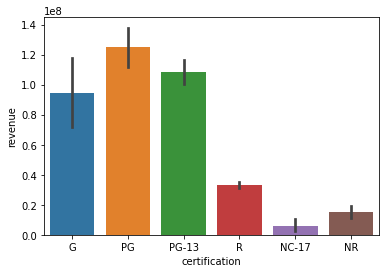

In [30]:
#visualization of test data
sns.barplot(data=df_no_outliers, x='certification',y='revenue');

# A movies lead time has an effect on its' popularity.


- $H_0$ (Null Hypothesis): The runtime of a movie has no effect on it's popularity.

- $H_A$ (Alternative Hypothesis): There is a significant effect on a movies popularity when its' runtime is longer that 90 minutes

 - Test selection
 
 > Our test groups are binomial being either over 90 minutes(true) or not(false). The metric will be using, popularity, is numerical
 
> We will be using a 2-sample T-Test that has the following assumptions: No significant outliers, normality, and equal variance
        

In [31]:
#create a new column for the boolean value of runtime > 120
df['over 2 hours'] = df['runtime'] > 120
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,over 2 hours
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.407,2000-09-29,12854953.0,99.0,In the Mood for Love,8.106,1925.0,PG,False
9,tt0120263,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",6.043,2000-10-06,80334.0,98.0,Songs from the Second Floor,7.234,214.0,NaN,False
10,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.832,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R,False
12,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",45.751,2000-06-21,224834564.0,84.0,Chicken Run,6.723,4086.0,G,False
15,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",9.333,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.942,252.0,R,True


>We are using the limit of 2 hours as it is a good approximation for the average runtime of movies since 2001. 

In [32]:
#seperate the columns needed for the two groups
df_long = df.loc[df['over 2 hours']==True, ['popularity', 'over 2 hours']]
df_short = df.loc[df['over 2 hours']==False, ['popularity', 'over 2 hours']]
#concat together for inital visualization
plot_df = pd.concat([df_long, df_short], axis=0)
plot_df

,popularity,over 2 hours
15,9.333,True
16,34.178,True
53,12.539,True
55,10.669,True
61,5.272,True
...,...,...
60540,4.094,False
60558,4.961,False
60578,9.164,False
60579,103.665,False


<AxesSubplot:xlabel='over 2 hours', ylabel='popularity'>

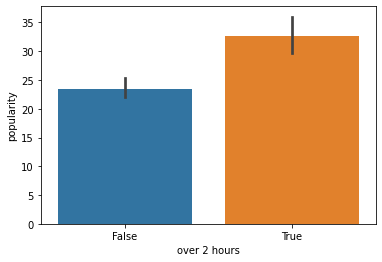

In [33]:
#initial visualizations
sns.barplot(data=plot_df, x='over 2 hours', y='popularity')

## Testing assumptions

In [34]:
#save the groups a series groups for easier testing workflow
long_group = df_long['popularity']
short_group = df_short['popularity']
display(long_group.head(), short_group.head())

15     9.333
16    34.178
53    12.539
55    10.669
61     5.272
Name: popularity, dtype: float64

3     21.407
9      6.043
10     3.832
12    45.751
17     2.024
Name: popularity, dtype: float64

- Removal of outliers

In [35]:
long_outlier = np.abs(stats.zscore(long_group)) > 3
print(f"There are {long_outlier.sum()} outliers out of {len(long_group)} entries")

There are 29 outliers out of 1601 entries


In [36]:
long_group = long_group.loc[~long_outlier]
print(long_group.shape)
long_group.head()

(1572,)


15     9.333
16    34.178
53    12.539
55    10.669
61     5.272
Name: popularity, dtype: float64

In [37]:
short_outlier = np.abs(stats.zscore(short_group)) > 3
print(f"There are {short_outlier.sum()} outliers out of {len(short_group)} entries")

There are 52 outliers out of 5983 entries


In [38]:
short_group = short_group.loc[~short_outlier]
print(short_group.shape)
short_group.head()

(5931,)


3     21.407
9      6.043
10     3.832
12    45.751
17     2.024
Name: popularity, dtype: float64

- Normality

>Both groups have n > 15, we can ignore the normality assumption.

- Equal Variance

In [39]:
result = stats.levene(long_group, short_group)
print(results)
print(results.pvalue<.05)

F_onewayResult(statistic=120.2730314100259, pvalue=1.6106115695373416e-120)
True


>Our groups do not have equal variance as the tests' p value is less than .05

## T-Test

In [40]:
result = stats.ttest_ind(long_group, short_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=6.154783353926026, pvalue=9.063211762840099e-10)


True

## Conclusion

> The T-Test p value is less than .05. We reject the null hypothesis that the runtime has no effect on the popularity of the movie. We can see in the plot below that movies over the 120 average runtime are about 5% more popular than shorter movies

<AxesSubplot:xlabel='over 2 hours', ylabel='popularity'>

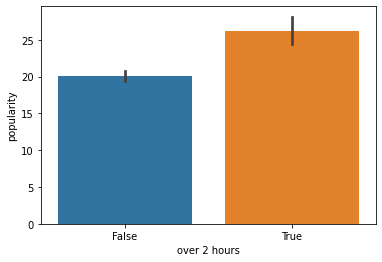

In [41]:
plot_df = pd.concat([df_long.loc[~long_outlier],
                     df_short.loc[~short_outlier]], axis=0)

sns.barplot(data=plot_df, x='over 2 hours', y='popularity')

# Do movies released in 2018, before the Covid pandemic, earn more revenue that movies released in 2020, the first year of the pandemic?

- $H_0$ (Null Hypothesis): There is no difference in revenue between 2018 & 2020 movies.

- $H_A$ (Alternative Hypothesis): There is a significant difference in revenue between pre-pandemic 2018 movies and mid-pandemic 2020 movies.

- Test selection

>We are comparing to categories of movies, 2018 and 2020 releases, by a numeric metric, revenue.


>The 2-sample T-Test has the following assumptions:

    No significant outliers
    Normality
    Equal Variance



In [42]:
#first, we have to seperate the year, month, and day in the release_date column
df[['year', 'month', 'day']] = df['release_date'].str.split('-', expand=True)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,over 2 hours,year,month,day
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.407,2000-09-29,12854953.0,99.0,In the Mood for Love,8.106,1925.0,PG,False,2000,09,29
9,tt0120263,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",6.043,2000-10-06,80334.0,98.0,Songs from the Second Floor,7.234,214.0,NaN,False,2000,10,06
10,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.832,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R,False,2002,04,26
12,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",45.751,2000-06-21,224834564.0,84.0,Chicken Run,6.723,4086.0,G,False,2000,06,21
15,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",9.333,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.942,252.0,R,True,2000,02,09


In [43]:
#next, remove all movies with zero revenue
df.drop(df[df['revenue']==0].index, inplace = True)
df.head()

,imdb_id,adult,belongs_to_collection,budget,genres,popularity,release_date,revenue,runtime,title,vote_average,vote_count,certification,over 2 hours,year,month,day
3,tt0118694,0.0,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",21.407,2000-09-29,12854953.0,99.0,In the Mood for Love,8.106,1925.0,PG,False,2000,09,29
9,tt0120263,0.0,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",6.043,2000-10-06,80334.0,98.0,Songs from the Second Floor,7.234,214.0,NaN,False,2000,10,06
10,tt0120467,0.0,NaN,120000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 27, 'name...",3.832,2002-04-26,14904.0,87.0,Vulgar,5.400,42.0,R,False,2002,04,26
12,tt0120630,0.0,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",45.751,2000-06-21,224834564.0,84.0,Chicken Run,6.723,4086.0,G,False,2000,06,21
15,tt0120753,0.0,NaN,8000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",9.333,2000-02-09,105983.0,122.0,The Million Dollar Hotel,5.942,252.0,R,True,2000,02,09


In [44]:
#create dataframes for the two target years
df_2018 = df.loc[df['year']=='2018', ['revenue', 'year']]
df_2020 = df.loc[df['year']=='2020', ['revenue', 'year']]
#concat together for inital visualization
plot_df = pd.concat([df_2018, df_2020], axis=0)
plot_df

,revenue,year
39623,10832.0,2018
39724,3335913.0,2018
39928,10615000.0,2018
40073,24.0,2018
40156,231719.0,2018
...,...,...
56910,225374.0,2020
56917,39328.0,2020
56924,6700000.0,2020
56937,11136444.0,2020


<AxesSubplot:xlabel='year', ylabel='revenue'>

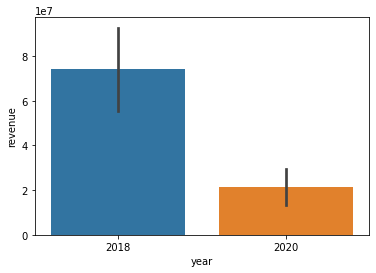

In [45]:
#initial visualization
sns.barplot(data=plot_df, x='year', y='revenue')

In [46]:
#save the groups a series groups for easier testing workflow
group_2018 = df_2018['revenue']
group_2020 = df_2020['revenue']
display(group_2018.head(), group_2020.head())

39623       10832.0
39724     3335913.0
39928    10615000.0
40073          24.0
40156      231719.0
Name: revenue, dtype: float64

44915     548608.0
46013      26563.0
48510    3364426.0
48793     273639.0
49320     742476.0
Name: revenue, dtype: float64

## Testing assumptions

- Removing outliers

In [47]:
outliers_2018 = np.abs(stats.zscore(group_2018)) > 3
print(f"There are {outliers_2018.sum()} outliers out of {len(group_2018)} entries")

There are 9 outliers out of 413 entries


In [48]:
group_2018 = group_2018.loc[~outliers_2018]
group_2018.info()

<class 'pandas.core.series.Series'>
Int64Index: 404 entries, 39623 to 55740
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
404 non-null    float64
dtypes: float64(1)
memory usage: 6.3 KB


In [49]:
outliers_2020 = np.abs(stats.zscore(group_2020)) > 3
print(f"There are {outliers_2020.sum()} outliers out of {len(group_2020)} entries")

There are 7 outliers out of 248 entries


In [50]:
group_2020 = group_2020.loc[~outliers_2020]
group_2020.info()

<class 'pandas.core.series.Series'>
Int64Index: 241 entries, 44915 to 56945
Series name: revenue
Non-Null Count  Dtype  
--------------  -----  
241 non-null    float64
dtypes: float64(1)
memory usage: 3.8 KB


- Normality

> Each group is n > 15 so we can ignore the assumption of normality.

- Equal Variance

In [51]:
result = stats.levene(group_2018, group_2020)
print(results)
print(results.pvalue<.05)

F_onewayResult(statistic=120.2730314100259, pvalue=1.6106115695373416e-120)
True


> The p value for the equal variance test is smaller than the alpha of .05, even smaller than .000001. As such, we reject the null hypo
thesis that our groups have equal variance and we will be setting equal_variance=False in the statistical test.

## T-Test

In [52]:
result = stats.ttest_ind(long_group, short_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=6.154783353926026, pvalue=9.063211762840099e-10)


True

## Conclusion

<AxesSubplot:xlabel='year', ylabel='revenue'>

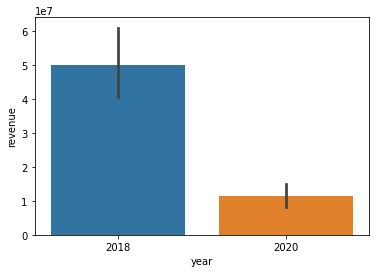

In [54]:
plot_df = pd.concat([df_2018.loc[~outliers_2018],
                     df_2020.loc[~outliers_2020]], axis=0)

sns.barplot(data=plot_df, x='year', y='revenue')

>The initial barplot of the data did show that 2020 movies had lower revenue. Which makes sense as 2020 was the year of lockdowns and social distancing efforts. However, the test data makes the difference even more stark. 2020 mean revenues, according to the final barplot, are roughly 20% of 2018 mean revenues. 